# Unsupervised Clustering KMeans model #

In [446]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Import CSV data file ###

In [447]:
data = pd.read_csv('km_data.csv')
data.head()

,image_id,terrain_undefined,Red,Green
0,jpgs/S26047238.jpg,1,66,81
1,jpgs/P26057146.jpg,0,75,72
2,jpgs/P26054308.jpg,0,76,70
3,jpgs/P26050957.jpg,1,74,80
4,jpgs/P26057962.jpg,0,65,61


### Basic Statistics for data ###

In [448]:
data.describe()

,terrain_undefined,Red,Green
count,130.000000,130.000000,130.000000
mean,0.500000,72.284615,74.738462
std,0.501934,8.006039,9.152925
min,0.000000,52.000000,55.000000
25%,0.000000,68.000000,68.250000
50%,0.500000,73.000000,76.000000
75%,1.000000,78.000000,81.000000
max,1.000000,93.000000,95.000000


### Remove the object data type from the data file because it's not useful for the model

In [449]:
data = data.drop(['image_id'], axis=1)
data.head()

,terrain_undefined,Red,Green
0,1,66,81
1,0,75,72
2,0,76,70
3,1,74,80
4,0,65,61


### Applying KMeans model into the data

In [443]:
X = np.array(data.drop(['terrain_undefined'], 1).astype(float))
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y = kmeans.predict(X)

### Plot the unsupervised clustering graph

[[65.15686275 65.60784314]
 [76.88607595 80.63291139]]


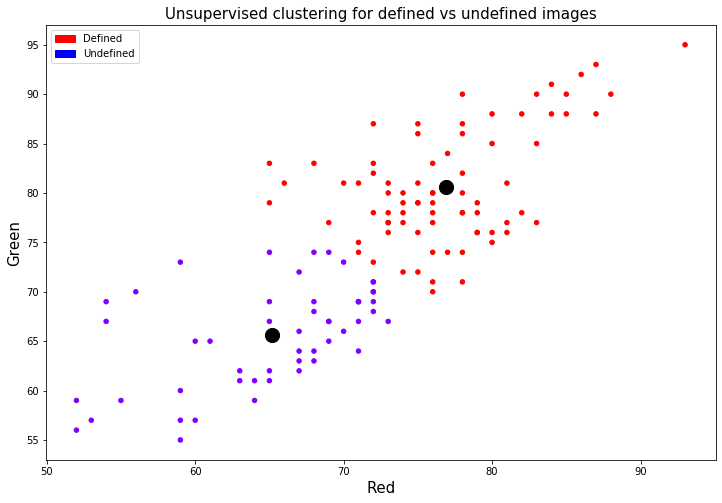

In [444]:
matplotlib.rc('axes', labelsize=15)
matplotlib.rc('axes', titlesize=15)
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='rainbow')
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=200, cmap='RdBu',
            color='black')

plt.xlabel('Red')
plt.ylabel('Green')
defined = mpatches.Patch(color='red', label='Defined')
undefined = mpatches.Patch(color='blue', label='Undefined')
plt.legend(handles=[defined,undefined])
plt.title("Unsupervised clustering for defined vs undefined images")
plt.savefig('cluster_image.png', dpi = 100)
plt.show()

### Creating the data to test the KMeans model

In [445]:
kmeans_data = data.drop(['terrain_undefined'], axis=1)
kmeans_data.head()

,Red,Green
0,66,81
1,75,72
2,76,70
3,74,80
4,65,61


### Spliting the train data and test data from the original data set

In [439]:
X_train, X_test, y_train, y_test = train_test_split(kmeans_data, data['terrain_undefined'], random_state=22)
print(X_train.shape, X_test.shape)

(97, 2) (33, 2)


### Checking the accuracy of the model

In [440]:
clf = LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
accuracy_score(y_test, ypred)

C:\Users\rinty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8787878787878788